# DBSCAN

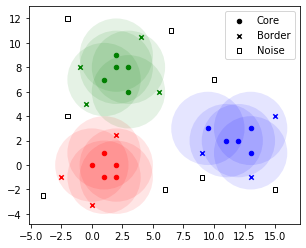

In [202]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np

ep = 3
cores = [
    np.array([[0,0],[1,-1],[2,-1],[1,1],[2,0]]),
    np.array([[1,9],[2,10],[2,11],[3,10],[3,8]]) - [0,2],
    np.array([[9.5,3],[11,2],[13,3],[12,2],[13,1]])
]
borders = [
    np.array([[2,2.5],[0,-3.3],[-2.5,-1]]),
    np.array([[-0.5,7],[-1,10],[4,12.5],[5.5,8]]) - [0,2],
    np.array([[9,1],[15,4],[13,-1]])
]
noise = np.array([
    [-2,4],[-4,-2.5],[-2,12],[6,-2],[9,-1],[15,-2],[10,7],[6.5,11]
])

debug = False
colors = ['r', 'g', 'b']
ax = plt.axes()
ax.set_aspect('equal')
for c in range(len(cores)):
    for x, y in cores[c]:
        circle = patches.Circle(xy=([x, y]), radius=ep, fc=colors[c], alpha=0.1)
        ax.add_patch(circle)
    # 確認用
    if debug:
        for x, y in borders[c]:
            circle = patches.Circle(xy=([x, y]), radius=ep, fc=colors[c], alpha=0.1)
            ax.add_patch(circle)
    ax.scatter(cores[c][:,0], cores[c][:,1], c=colors[c], s=20)
    ax.scatter(borders[c][:,0], borders[c][:,1], c=colors[c], s=20, marker='x')
ax.scatter([], [], s=20, color='black', label='Core')
ax.scatter([], [], s=20, marker='x', color='black', label='Border')
ax.scatter(noise[:,0], noise[:,1], s=20, marker=',', facecolor='None', edgecolors='black', label='Noise')

if debug:
    plt.grid()
plt.legend()
plt.show()

In [90]:
import numpy as np

class DBSCAN:
    """
    Attributes
    ----------
    ep : float
        近傍とみなす距離
    min_pts : int
        コア点の近傍に必要な点の数
    cluster : numpy array
        入力データの所属クラスタ番号の配列
        -1はノイズ扱い
    """
    
    def __init__(self, ep, min_pts):
        self.ep = ep
        self.min_pts = min_pts
    
    def fit(self, data):
        n_data = len(data)
        # 距離行列
        dist = np.zeros([n_data, n_data])
        for i in range(n_data):
            for j in range(i+1, n_data):
                d = np.sqrt(np.sum((data[i] - data[j])**2))
                dist[i][j] = d
                dist[j][i] = d
        # 隣接判定行列
        is_neighbor = dist < self.ep
        for i in range(n_data):
            is_neighbor[i][i] = False
        # コアか否かの判定配列
        is_core = np.count_nonzero(is_neighbor, axis=1) >= self.min_pts
        # クラスタ構築
        cluster = np.full(n_data, -1)
        cnt_cluster = 0
        visited = set()
        cores = np.where(is_core)[0].tolist()
        while len(cores) > 0:
            i = cores.pop()
            if i in visited:
                continue
            visited.add(i)
            cluster[i] = cnt_cluster
            neighbors = np.where(is_neighbor[i])[0].tolist()
            while len(neighbors) > 0:
                j = neighbors.pop()
                if j in visited:
                    continue
                visited.add(j)
                cluster[j] = cnt_cluster
                if is_core[j]:
                    neighbors.extend(np.where(is_neighbor[j])[0].tolist())
            cnt_cluster += 1
        self.cluster = cluster

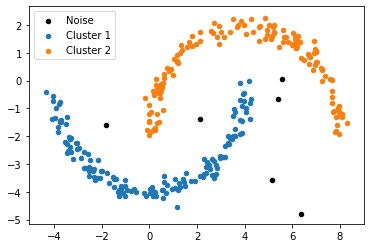

In [109]:
%matplotlib inline
from matplotlib import pyplot as plt

N = 300
R = 4
dR = 0.2
theta = np.random.rand(N) * np.pi
r = dR * np.random.randn(N) + R
data = np.array([r*np.cos(theta), r*np.sin(theta)]).T
data[:N//2] += [4, -2]
data[N//2:] *= [1, -1]
np.random.shuffle(data)
# ノイズを作成
for i in np.random.choice(range(N), 10, replace=False):
    data[i] = np.random.rand(2) * [14, 8] + [-5, -5]

clustering = DBSCAN(1.0, 3)
clustering.fit(data)

for c in np.unique(clustering.cluster):
    ids_c = np.where(clustering.cluster == c)[0]
    data_c = data[ids_c]
    if c == -1:
        plt.scatter(data_c[:, 0], data_c[:, 1], s=20, c='black', label='Noise')
    else:
        plt.scatter(data_c[:, 0], data_c[:, 1], s=20, label='Cluster {}'.format(c+1))
plt.legend()
plt.show()